In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import datetime
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('Hold/df2.csv')

In [5]:
df.head()         

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign_3,campaign_4,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5,previous_1,previous_2,previous_3
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,1,0,0,1
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,1,0,0,1
2,56,housemaid,married,basic.4y,no,yes,no,telephone,may,fri,...,1,0,0,0,0,0,1,0,0,1
3,56,housemaid,married,basic.4y,no,no,no,telephone,jun,wed,...,0,0,0,0,0,0,1,0,0,1
4,56,housemaid,married,basic.4y,no,no,yes,cellular,jul,mon,...,0,0,0,0,0,0,1,0,0,1


In [6]:
df.iloc[:,74:114].columns

Index(['age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8',
       'age_9', 'age_10', 'age_11', 'age_12', 'age_13', 'jobs_1', 'jobs_2',
       'jobs_3', 'jobs_4', 'married_1', 'married_2', 'education_1',
       'education_2', 'education_3', 'education_4', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'pdays_1', 'pdays_2', 'pdays_3', 'pdays_4',
       'pdays_5', 'previous_1', 'previous_2', 'previous_3'],
      dtype='object')

In [7]:
cols = list(df.iloc[:,74:114].columns)

In [8]:
df1 = df.drop(cols, axis=1)

In [9]:
x_cb = df.drop(['duration', 'emp.var.rate', 'euribor3m', 'previous_campaign_nonexistent', 'default', 'housing', 'loan',
     'marital', 'job', 'education', 'contact', 'month', 'day_of_week','poutcome'], axis=1)

In [10]:
# Alternative set of features
# drop target variable y, and the following due to 
# high correlation: emp.var.rate, euribor3m, and previous_campaign_nonexistent
x = df1.drop(['duration', 'emp.var.rate', 'euribor3m', 'previous_campaign_nonexistent', 'default', 'housing', 'loan',
     'marital', 'job', 'education', 'contact', 'month', 'day_of_week','poutcome'], axis=1)

In [16]:
df_majority = x[x.y == 0]
df_minority = x[x.y == 1]

In [17]:
print(len(df_majority))
print(len(df_minority))
print(len(df_minority) / len(x))
print(len(df_minority) * 4)

36548
4640
0.11265417111780131
18560


In [18]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=18560, random_state=42)

In [19]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [20]:
print(df_upsampled.y.value_counts())
print(len(df_upsampled[df_upsampled.y==1])/len(df_upsampled))

0    36548
1    18560
Name: y, dtype: int64
0.3367932060680845


In [21]:
# Start here working in custom columns

In [22]:
age = df.iloc[:, [0]].columns
prof = df.iloc[:,21:33].columns
marital = df.iloc[:, 33:37].columns
edu = df.iloc[:, 37:45].columns
months = df.iloc[:, 56:66].columns
campaign_pdays_previous = df.iloc[:, 11:14].columns
new = months.append([campaign_pdays_previous,months, edu, marital, prof, age] )

In [23]:
y = x.y
x.drop('y', axis=1, inplace=True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)

In [25]:
y_us = df_upsampled.y
x_us = df_upsampled.drop('y', axis=1)

In [26]:
print(y_us.shape)
print(x_us.shape)

(55108,)
(55108, 59)


In [27]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(x_us, y_us, test_size = .3, random_state=42)

In [28]:
y_cb = x_cb.y
x_cb.drop('y', axis=1, inplace=True)

In [29]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(x_cb, y_cb, test_size = .3, random_state=42)

In [30]:
len(y_train_cb)

28831

temp = x[x.unknown_profession > .5]
temp = temp[temp.unknown_profession < 1]
temp.sort_values('unknown_profession', ascending=False)
sm = SMOTE(ratio='minority')
x_, y_ = sm.fit_sample(x, y)
print(len(x_))
print(len(y_))
#new_header = x.iloc[0] #grab the first row for the header
#x = x[1:] #take the data less the header row
#x.columns = new_header #set the header row as the df header
x2 = pd.DataFrame(x_, columns = x.columns)
temp = x2[x2.unknown_profession > .5]
temp = temp[temp.unknown_profession < 1]
temp.sort_values('unknown_profession', ascending=False)
X_train, X_test, y_train, y_test = train_test_split(x2, y_, test_size = .3, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
X_train.columns
y_train = pd.DataFrame(y_train)
y_train.rename(columns={0: 'y'}, inplace=True)
y_train.reset_index(inplace=True)
X_train.reset_index(inplace=True)
X_train = pd.concat([X_train, y_train], axis=1, join ='inner')
X_train.columns
len(X_train)
X_train.drop('index', axis=1, inplace=True)
X_train = X_train.copy()
X_test = X_test.copy()

In [31]:
y_train = pd.DataFrame(y_train)
y_train.rename(columns={0: 'y'}, inplace=True)
y_train.reset_index(inplace=True)
X_train.reset_index(inplace=True)
X_train = pd.concat([X_train, y_train], axis=1, join ='inner')
X_train.drop('index', axis=1, inplace=True)

X_train = X_train.copy()
X_test = X_test.copy()

In [32]:
y_train_us = pd.DataFrame(y_train_us)
y_train_us.rename(columns={0: 'y'}, inplace=True)
y_train_us.reset_index(inplace=True)
X_train_us.reset_index(inplace=True)
X_train_us = pd.concat([X_train_us, y_train_us], axis=1, join ='inner')
X_train_us.drop('index', axis=1, inplace=True)

X_train_us = X_train_us.copy()
X_test_us = X_test_us.copy()

In [33]:
y_train_cb = pd.DataFrame(y_train_cb)
y_train_cb.rename(columns={0: 'y'}, inplace=True)
y_train_cb.reset_index(inplace=True)
X_train_cb.reset_index(inplace=True)
X_train_cb = pd.concat([X_train_cb, y_train_cb], axis=1, join ='inner')
X_train_cb.drop('index', axis=1, inplace=True)

X_train_cb = X_train_cb.copy()
X_test_cb = X_test_cb.copy()

In [34]:
len(y_train_cb)

28831

In [35]:
cols = list(X_train.columns[7:19])

for e in cols: 
    print(e)
    group = X_train[X_train[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    if(c == 'NaN'): print("Nan")
    print('')
    
    X_train.loc[X_train[e] == 1, 'prop_yes_by_job'] = c
    
    X_test.loc[X_test[e] == 1, 'prop_yes_by_job'] = c

unknown_profession
length of group 7332
sum of y:  951
count of y:  7332
0.129705400982

self-employed
length of group 6451
sum of y:  446
count of y:  6451
0.069136567974

admin.
length of group 1024
sum of y:  95
count of y:  1024
0.0927734375

services
length of group 737
sum of y:  72
count of y:  737
0.0976933514247

housemaid
length of group 2056
sum of y:  233
count of y:  2056
0.113326848249

retired
length of group 1178
sum of y:  299
count of y:  1178
0.253820033956

unemployed
length of group 1009
sum of y:  107
count of y:  1009
0.106045589693

management
length of group 2832
sum of y:  232
count of y:  2832
0.0819209039548

technician
length of group 606
sum of y:  197
count of y:  606
0.325082508251

entrepreneur
length of group 4683
sum of y:  495
count of y:  4683
0.105701473414

student
length of group 691
sum of y:  102
count of y:  691
0.147612156295

blue-collar
length of group 232
sum of y:  26
count of y:  232
0.112068965517



In [36]:
cols = list(X_train_us.columns[7:19])

for e in cols: 
    print(e)
    group = X_train_us[X_train_us[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    if(c == 'NaN'): print("Nan")
    print('')
    
    X_train_us.loc[X_train_us[e] == 1, 'prop_yes_by_job'] = c
    
    X_test_us.loc[X_test_us[e] == 1, 'prop_yes_by_job'] = c

unknown_profession
length of group 10171
sum of y:  3800
count of y:  10171
0.373611247665

self-employed
length of group 7792
sum of y:  1778
count of y:  7792
0.22818275154

admin.
length of group 1265
sum of y:  351
count of y:  1265
0.277470355731

services
length of group 946
sum of y:  278
count of y:  946
0.293868921776

housemaid
length of group 2791
sum of y:  951
count of y:  2791
0.340738086707

retired
length of group 2084
sum of y:  1188
count of y:  2084
0.570057581574

unemployed
length of group 1312
sum of y:  436
count of y:  1312
0.332317073171

management
length of group 3456
sum of y:  913
count of y:  3456
0.264178240741

technician
length of group 1193
sum of y:  782
count of y:  1193
0.655490360436

entrepreneur
length of group 6204
sum of y:  2036
count of y:  6204
0.328175370729

student
length of group 1056
sum of y:  439
count of y:  1056
0.41571969697

blue-collar
length of group 305
sum of y:  104
count of y:  305
0.340983606557



In [37]:
cols = list(X_train_cb.columns[7:19])

for e in cols: 
    print(e)
    group = X_train_cb[X_train_cb[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    if(c == 'NaN'): print("Nan")
    print('')
    
    X_train_cb.loc[X_train_cb[e] == 1, 'prop_yes_by_job'] = c
    
    X_test_cb.loc[X_test_cb[e] == 1, 'prop_yes_by_job'] = c

unknown_profession
length of group 7332
sum of y:  951
count of y:  7332
0.129705400982

self-employed
length of group 6451
sum of y:  446
count of y:  6451
0.069136567974

admin.
length of group 1024
sum of y:  95
count of y:  1024
0.0927734375

services
length of group 737
sum of y:  72
count of y:  737
0.0976933514247

housemaid
length of group 2056
sum of y:  233
count of y:  2056
0.113326848249

retired
length of group 1178
sum of y:  299
count of y:  1178
0.253820033956

unemployed
length of group 1009
sum of y:  107
count of y:  1009
0.106045589693

management
length of group 2832
sum of y:  232
count of y:  2832
0.0819209039548

technician
length of group 606
sum of y:  197
count of y:  606
0.325082508251

entrepreneur
length of group 4683
sum of y:  495
count of y:  4683
0.105701473414

student
length of group 691
sum of y:  102
count of y:  691
0.147612156295

blue-collar
length of group 232
sum of y:  26
count of y:  232
0.112068965517



In [38]:
cols = X_train.columns[19:23]
for e in cols: 
    print(e)
    group = X_train[X_train[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    print('')
    X_train.loc[X_train[e] == 1, 'prop_yes_by_ms'] = c
    X_test.loc[X_test[e] == 1, 'prop_yes_by_ms'] = c

divorced
length of group 3258
sum of y:  332
count of y:  3258
0.10190300798

unknown_marital_status
length of group 17382
sum of y:  1773
count of y:  17382
0.102002071108

married
length of group 8132
sum of y:  1142
count of y:  8132
0.140432857846

single
length of group 59
sum of y:  8
count of y:  59
0.135593220339



In [39]:
cols = X_train_us.columns[19:23]
for e in cols: 
    print(e)
    group = X_train_us[X_train_us[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    print('')
    X_train_us.loc[X_train_us[e] == 1, 'prop_yes_by_ms'] = c
    X_test_us.loc[X_test_us[e] == 1, 'prop_yes_by_ms'] = c


divorced
length of group 4242
sum of y:  1313
count of y:  4242
0.309523809524

unknown_marital_status
length of group 22784
sum of y:  7175
count of y:  22784
0.314913974719

married
length of group 11460
sum of y:  4530
count of y:  11460
0.395287958115

single
length of group 89
sum of y:  38
count of y:  89
0.426966292135



In [40]:
cols = X_train_cb.columns[19:23]
for e in cols: 
    print(e)
    group = X_train_cb[X_train_cb[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    print('')
    X_train_cb.loc[X_train_cb[e] == 1, 'prop_yes_by_ms'] = c
    X_test_cb.loc[X_test_cb[e] == 1, 'prop_yes_by_ms'] = c


divorced
length of group 3258
sum of y:  332
count of y:  3258
0.10190300798

unknown_marital_status
length of group 17382
sum of y:  1773
count of y:  17382
0.102002071108

married
length of group 8132
sum of y:  1142
count of y:  8132
0.140432857846

single
length of group 59
sum of y:  8
count of y:  59
0.135593220339



In [41]:
cols = X_train.columns[23:31]
for e in cols: 
    print(e)
    group = X_train[X_train[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    print('')
    X_train.loc[X_train[e] == 1, 'prop_yes_by_edu'] = c
    X_test.loc[X_test[e] == 1, 'prop_yes_by_edu'] = c

professional.course
length of group 2883
sum of y:  290
count of y:  2883
0.100589663545

unknown_education
length of group 1585
sum of y:  122
count of y:  1585
0.0769716088328

university.degree
length of group 4198
sum of y:  333
count of y:  4198
0.0793234873749

basic.4y
length of group 6702
sum of y:  730
count of y:  6702
0.108922709639

illiterate
length of group 17
sum of y:  4
count of y:  17
0.235294117647

basic.9y
length of group 3658
sum of y:  418
count of y:  3658
0.114270092947

high.school
length of group 8556
sum of y:  1180
count of y:  8556
0.137914913511

basic.6y
length of group 1232
sum of y:  178
count of y:  1232
0.144480519481



In [42]:
cols = X_train_us.columns[23:31]
for e in cols: 
    print(e)
    group = X_train_us[X_train_us[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    print('')
    X_train_us.loc[X_train_us[e] == 1, 'prop_yes_by_edu'] = c
    X_test_us.loc[X_test_us[e] == 1, 'prop_yes_by_edu'] = c

professional.course
length of group 3764
sum of y:  1165
count of y:  3764
0.309511158342

unknown_education
length of group 2036
sum of y:  555
count of y:  2036
0.272593320236

university.degree
length of group 5172
sum of y:  1328
count of y:  5172
0.256767208043

basic.4y
length of group 8967
sum of y:  2974
count of y:  8967
0.331660533066

illiterate
length of group 15
sum of y:  6
count of y:  15
0.4

basic.9y
length of group 4830
sum of y:  1633
count of y:  4830
0.338095238095

high.school
length of group 12110
sum of y:  4722
count of y:  12110
0.389925681255

basic.6y
length of group 1681
sum of y:  673
count of y:  1681
0.400356930399



In [43]:
cols = X_train_cb.columns[23:31]
for e in cols: 
    print(e)
    group = X_train_cb[X_train_cb[e] == 1]
    print('length of group', len(group))
  
    a = group['y'].sum()
    print('sum of y: ', a)
    b = group['y'].count()
    print('count of y: ', b)
    c = a/b
    print(c)
    print('')
    X_train_cb.loc[X_train_cb[e] == 1, 'prop_yes_by_edu'] = c
    X_test_cb.loc[X_test_cb[e] == 1, 'prop_yes_by_edu'] = c

professional.course
length of group 2883
sum of y:  290
count of y:  2883
0.100589663545

unknown_education
length of group 1585
sum of y:  122
count of y:  1585
0.0769716088328

university.degree
length of group 4198
sum of y:  333
count of y:  4198
0.0793234873749

basic.4y
length of group 6702
sum of y:  730
count of y:  6702
0.108922709639

illiterate
length of group 17
sum of y:  4
count of y:  17
0.235294117647

basic.9y
length of group 3658
sum of y:  418
count of y:  3658
0.114270092947

high.school
length of group 8556
sum of y:  1180
count of y:  8556
0.137914913511

basic.6y
length of group 1232
sum of y:  178
count of y:  1232
0.144480519481



In [44]:
X_train.drop('y', axis=1, inplace=True)

In [45]:
X_train_us.drop('y', axis=1, inplace=True)

In [46]:
X_train_cb.drop('y', axis=1, inplace=True)

In [47]:
X_train_cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Columns: 102 entries, age to prop_yes_by_edu
dtypes: float64(6), int64(96)
memory usage: 22.4 MB


In [48]:
X_train_cb.drop(new, axis=1, inplace=True)

In [49]:
X_test_cb.drop(new, axis=1, inplace=True)

In [50]:
X_train_cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 64 columns):
cons.price.idx               28831 non-null float64
cons.conf.idx                28831 non-null float64
nr.employed                  28831 non-null float64
unknown_default              28831 non-null int64
yes_default                  28831 non-null int64
no_default                   28831 non-null int64
unknown_housing              28831 non-null int64
yes_housing                  28831 non-null int64
no_housing                   28831 non-null int64
unknown_loan                 28831 non-null int64
yes_loan                     28831 non-null int64
no_loan                      28831 non-null int64
telephone                    28831 non-null int64
cellular                     28831 non-null int64
tue                          28831 non-null int64
wed                          28831 non-null int64
mon                          28831 non-null int64
fri                          28831 

In [51]:
y_train.drop('index', axis=1, inplace=True)

In [52]:
y_train = y_train.values.ravel()

In [53]:
y_train_us.drop('index', axis=1, inplace=True)

In [54]:
y_train_us = y_train_us.values.ravel()

In [55]:
y_train_cb.drop('index', axis=1, inplace=True)
y_train_cb = y_train_cb.values.ravel()

In [56]:
len(y_train_cb)

28831

In [57]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = lr.score(X_test, y_test)
print("Test: {}".format(test_score))

Train: 0.8991710311817142
Test: 0.9019179412478757


In [58]:
lr = LogisticRegression()
lr.fit(X_train_us, y_train_us)
train_score = lr.score(X_train_us, y_train_us)
print("Train: {}".format(train_score))

test_score = lr.score(X_test_us, y_test_us)
print("Test: {}".format(test_score))

Train: 0.7678548282566429
Test: 0.7718502389161072


In [59]:
lr = LogisticRegression()
lr.fit(X_train_cb, y_train_cb)
train_score_cb = lr.score(X_train_cb, y_train_cb)
print("Train: {}".format(train_score_cb))

test_score_cb = lr.score(X_test_cb, y_test_cb)
print("Test: {}".format(test_score_cb))

Train: 0.8948354202074156
Test: 0.8984381322327426


In [65]:
print('Starting random search on LR at: ', datetime.datetime.now())

param_grid = { 
              "C": [0.001,0.01,0.1,1,10,100]
}

lr = LogisticRegression(random_state = 0)
print('classifier substantiated')
    
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)
print('search substantiated')
    
print("Start random fit: ", datetime.datetime.now())
CV_lr.fit(X_train, y_train)
print("End random fit: ", datetime.datetime.now())

print('Best Params: ', CV_lr.best_params_)
bp = CV_lr.best_params_ # best parameters

lr = LogisticRegression(
C = bp['C'],  
penalty = 'l2')
    
print('Classifier with best parameters set')
     
print("Start rfr fit: ", datetime.datetime.now())
lr.fit(X_train, y_train)
print("End rfr fit: ", datetime.datetime.now())

train_score = lr.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = lr.score(X_test, y_test)
print("Test: {}".format(test_score))

print('Ending random search on LR at: ', datetime.datetime.now())

# ROC curve calculations
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, preds)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Precision recall curve calculations
y_score = lr.decision_function(X_test)

average_precision_lr = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_lr))

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_score)

Starting random search on LR at:  2018-05-01 12:54:57.494377
classifier substantiated
search substantiated
Start random fit:  2018-05-01 12:54:57.496057
End random fit:  2018-05-01 12:55:02.380189
Best Params:  {'C': 1}
Classifier with best parameters set
Start rfr fit:  2018-05-01 12:55:02.381426
End rfr fit:  2018-05-01 12:55:02.699735
Train: 0.8991710311817142
Test: 0.9019179412478757
Ending random search on LR at:  2018-05-01 12:55:02.723895
Average precision-recall score: 0.44


In [82]:
print('Starting random search on LR at: ', datetime.datetime.now())

param_grid = { 
              "C": [0.1,1,10,100, 200, 500, 1000]
}

lr = LogisticRegression(random_state = 0)
print('classifier substantiated')
    
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)
print('search substantiated')
    
print("Start random fit: ", datetime.datetime.now())
CV_lr.fit(X_train_us, y_train_us)
print("End random fit: ", datetime.datetime.now())

print('Best Params: ', CV_lr.best_params_)
bp = CV_lr.best_params_ # best parameters

lr = LogisticRegression(
C = bp['C'],  
penalty = 'l2')
    
print('Classifier with best parameters set')
     
print("Start rfr fit: ", datetime.datetime.now())
lr.fit(X_train_us, y_train_us)
print("End rfr fit: ", datetime.datetime.now())

train_score = lr.score(X_train_us, y_train_us)
print("Train: {}".format(train_score))

test_score = lr.score(X_test_us, y_test_us)
print("Test: {}".format(test_score))

print('Ending random search on LR at: ', datetime.datetime.now())

# ROC curve calculations
probs = lr.predict_proba(X_test_us)
preds = probs[:,1]
fpr_lr_us, tpr_lr_us, threshold_lr_us = roc_curve(y_test_us, preds)
roc_auc_lr_us = auc(fpr_lr_us, tpr_lr_us)

# Precision recall curve calculations
y_score_us = lr.decision_function(X_test_us)

average_precision_lr_us = average_precision_score(y_test_us, y_score_us)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_lr_us))

precision_lr_us, recall_lr_us, _ = precision_recall_curve(y_test_us, y_score_us)

Starting random search on LR at:  2018-05-01 13:22:01.779414
classifier substantiated
search substantiated
Start random fit:  2018-05-01 13:22:01.781335
End random fit:  2018-05-01 13:22:08.823477
Best Params:  {'C': 100}
Classifier with best parameters set
Start rfr fit:  2018-05-01 13:22:08.824347
End rfr fit:  2018-05-01 13:22:09.131813
Train: 0.7678548282566429
Test: 0.7718502389161072
Ending random search on LR at:  2018-05-01 13:22:09.160453
Average precision-recall score: 0.70


In [61]:
print('Starting random search on LR at: ', datetime.datetime.now())

param_grid = { 
              "C": [0.001,0.01,0.1,1,10,100]
}

lr = LogisticRegression(random_state = 0)
print('classifier substantiated')
    
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)
print('search substantiated')
    
print("Start random fit: ", datetime.datetime.now())
CV_lr.fit(X_train_cb, y_train_cb)
print("End random fit: ", datetime.datetime.now())

print('Best Params: ', CV_lr.best_params_)
bp = CV_lr.best_params_ # best parameters

lr = LogisticRegression(
C = bp['C'],  
penalty = 'l2')
    
print('Classifier with best parameters set')
     
print("Start rfr fit: ", datetime.datetime.now())
lr.fit(X_train_cb, y_train_cb)
print("End rfr fit: ", datetime.datetime.now())

train_score = lr.score(X_train_cb, y_train_cb)
print("Train: {}".format(train_score))

test_score = lr.score(X_test_cb, y_test_cb)
print("Test: {}".format(test_score))

print('Ending random search on LR at: ', datetime.datetime.now())

# ROC curve calculations
probs = lr.predict_proba(X_test_cb)
preds = probs[:,1]
fpr_lr_cb, tpr_lr_cb, threshold_lr_cb = roc_curve(y_test_cb, preds)
roc_auc_lr_cb = auc(fpr_lr_cb, tpr_lr_cb)

# Precision recall curve calculations
y_score_cb = lr.decision_function(X_test_cb)

average_precision_lr_cb = average_precision_score(y_test_cb, y_score_cb)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_lr_cb))

precision_lr_cb, recall_lr_cb, _ = precision_recall_curve(y_test_cb, y_score_cb)

Starting random search on LR at:  2018-05-01 12:51:55.629549
classifier substantiated
search substantiated
Start random fit:  2018-05-01 12:51:55.631081
End random fit:  2018-05-01 12:51:59.566376
Best Params:  {'C': 0.01}
Classifier with best parameters set
Start rfr fit:  2018-05-01 12:51:59.567838
End rfr fit:  2018-05-01 12:51:59.798887
Train: 0.8945926259928549
Test: 0.8985190580237922
Ending random search on LR at:  2018-05-01 12:51:59.825846
Average precision-recall score: 0.42


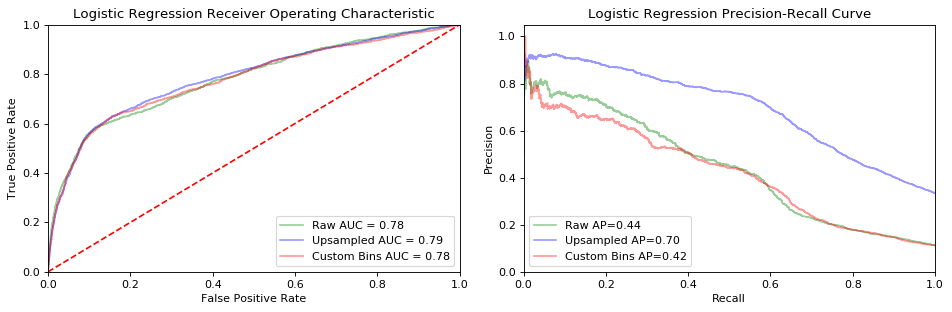

In [85]:
plt.gcf().clear()

plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,2)

plt.step(recall_lr, precision_lr, color='g', alpha=0.4,
         where='post', label = 'Raw AP={0:0.2f}'.format(
          average_precision_lr))

plt.step(recall_lr_us, precision_lr_us, color='b', alpha=0.4,
         where='post', label = 'Upsampled AP={0:0.2f}'.format(
          average_precision_lr_us))

plt.step(recall_lr_cb, precision_lr_cb, color='r', alpha=0.4,
         where='post', label = 'Custom Bins AP={0:0.2f}'.format(
          average_precision_lr_cb))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Logistic Regression Precision-Recall Curve')
plt.legend(loc = 'lower left')

plt.subplot(1,2,1)

plt.title('Logistic Regression Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'g', label = 'Raw AUC = %0.2f' % roc_auc_lr, alpha=0.4)
plt.plot(fpr_lr_us, tpr_lr_us, 'b', label = 'Upsampled AUC = %0.2f' % roc_auc_lr_us, alpha=0.4)
plt.plot(fpr_lr_cb, tpr_lr_cb, 'r', label = 'Custom Bins AUC = %0.2f' % roc_auc_lr_cb, alpha=0.4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.tight_layout()
plt.show()

In [73]:
rfc = RandomForestClassifier(random_state=0)

In [74]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
importance = list(rfc.feature_importances_)
feature = list(X_train.columns)

feature_importance = pd.DataFrame({'Feature': feature, 'Importance': importance})

print('Feature importance determined from random forest')
print(feature_importance.sort_values('Importance', ascending=False))

Feature importance determined from random forest
                      Feature  Importance
0                         age    0.185243
1                    campaign    0.086986
6                 nr.employed    0.067201
2                       pdays    0.050529
5               cons.conf.idx    0.048742
4              cons.price.idx    0.040050
59            prop_yes_by_job    0.033644
61            prop_yes_by_edu    0.029022
3                    previous    0.023292
34            unknown_housing    0.021462
36                 no_housing    0.021283
54                        mon    0.019557
55                        fri    0.019343
52                        tue    0.019338
53                        wed    0.019121
56                        thu    0.017874
60             prop_yes_by_ms    0.016319
37               unknown_loan    0.015211
39                    no_loan    0.014713
7          unknown_profession    0.012841
20     unknown_marital_status    0.012022
57  previous_campaign_failu

In [76]:
train_score = rfc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = rfc.score(X_test, y_test)
print("Test: {}".format(test_score))

Train: 0.9808192570497034
Test: 0.8863801893663511


In [87]:
# Running random search on RFC
print('Starting random search on RFC at: ', datetime.datetime.now())

param_grid = { 
              "n_estimators": np.arange(300, 400, 10),
              "max_features" : ['auto'],
              "min_samples_leaf": np.arange(2,12,2),
              'max_depth' : np.arange(10, 35, 5)
}

rfc = RandomForestClassifier(n_jobs=-1, oob_score= True, random_state = 0)
print('classifier substantiated')
    
CV_rfr = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=3)
print('search substantiated')
    
print("Start random fit: ", datetime.datetime.now())
CV_rfr.fit(X_train, y_train)
print("End random fit: ", datetime.datetime.now())

print('Best Params: ', CV_rfr.best_params_)
bp = CV_rfr.best_params_ # best parameters

rfc = RandomForestClassifier(
n_estimators = bp['n_estimators'], 
max_features= bp['max_features'],
min_samples_leaf= bp['min_samples_leaf'], 
max_depth=bp['max_depth'])
    
print('Classifier with best parameters set')
     
print("Start rfr fit: ", datetime.datetime.now())
rfc.fit(X_train, y_train)
print("End rfr fit: ", datetime.datetime.now())

train_score = rfc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = rfc.score(X_test, y_test)
print("Test: {}".format(test_score))

print('Ending random search on RFR at: ', datetime.datetime.now())

# ROC curve calculations
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, preds)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
print('AUC: ', roc_auc_rfc)

Starting random search on RFC at:  2018-05-01 13:34:20.983613
classifier substantiated
search substantiated
Start random fit:  2018-05-01 13:34:21.017453
End random fit:  2018-05-01 13:36:07.439435
Best Params:  {'n_estimators': 350, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30}
Classifier with best parameters set
Start rfr fit:  2018-05-01 13:36:07.440717
End rfr fit:  2018-05-01 13:36:18.333783
Train: 0.9201207034095245
Test: 0.9003803512179331
Ending random search on RFR at:  2018-05-01 13:36:21.965010
AUC:  0.781647837423


In [92]:
# Running random search on RFC
print('Starting random search on RFC at: ', datetime.datetime.now())

param_grid = { 
              "n_estimators": np.arange(300, 400, 10),
              "max_features" : ['auto'],
              "min_samples_leaf": np.arange(1,5,1),
              'max_depth' : np.arange(25, 55, 5)
}

rfc = RandomForestClassifier(n_jobs=-1, oob_score= True, random_state = 0)
print('classifier substantiated')
    
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=3)
print('search substantiated')
    
print("Start random fit: ", datetime.datetime.now())
CV_rfc.fit(X_train_us, y_train_us)
print("End random fit: ", datetime.datetime.now())

print('Best Params: ', CV_rfc.best_params_)
bp = CV_rfc.best_params_ # best parameters

rfc = RandomForestClassifier(
n_estimators = bp['n_estimators'], 
max_features= bp['max_features'],
min_samples_leaf= bp['min_samples_leaf'], 
max_depth=bp['max_depth'])
    
print('Classifier with best parameters set')
     
print("Start rfc fit: ", datetime.datetime.now())
rfc.fit(X_train_us, y_train_us)
print("End rfc fit: ", datetime.datetime.now())

train_score = rfc.score(X_train_us, y_train_us)
print("Train: {}".format(train_score))

test_score = rfc.score(X_test_us, y_test_us)
print("Test: {}".format(test_score))

print('Ending random search on rfc at: ', datetime.datetime.now())

# ROC curve calculations
probs = rfc.predict_proba(X_test_us)
preds = probs[:,1]
fpr_rfc_us, tpr_rfc_us, threshold_rfc_us = roc_curve(y_test_us, preds)
roc_auc_rfc_us = auc(fpr_rfc_us, tpr_rfc_us)
print(roc_auc_rfc_us)

Starting random search on RFC at:  2018-05-01 13:46:08.865793
classifier substantiated
search substantiated
Start random fit:  2018-05-01 13:46:08.890479
End random fit:  2018-05-01 13:49:02.332623
Best Params:  {'n_estimators': 340, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 35}
Classifier with best parameters set
Start rfc fit:  2018-05-01 13:49:02.333920
End rfc fit:  2018-05-01 13:49:21.139161
Train: 0.9937265068049255
Test: 0.938426177947136
Ending random search on rfc at:  2018-05-01 13:49:27.313566
0.980520649709


In [88]:
print(roc_auc_rfc_us)

0.904011953752


In [91]:
# Running random search on RFC
print('Starting random search on RFC at: ', datetime.datetime.now())

param_grid = { 
              "n_estimators": np.arange(300, 400, 10),
              "max_features" : ['auto'],
              "min_samples_leaf": np.arange(2,12,2),
              'max_depth' : np.arange(25, 55, 5)
}

rfc = RandomForestClassifier(n_jobs=-1, oob_score= True, random_state = 0)
print('classifier substantiated')
    
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=3)
print('search substantiated')
    
print("Start random fit: ", datetime.datetime.now())
CV_rfc.fit(X_train_cb, y_train_cb)
print("End random fit: ", datetime.datetime.now())

print('Best Params: ', CV_rfc.best_params_)
bp = CV_rfc.best_params_ # best parameters

rfc = RandomForestClassifier(
n_estimators = bp['n_estimators'], 
max_features= bp['max_features'],
min_samples_leaf= bp['min_samples_leaf'], 
max_depth=bp['max_depth'])
    
print('Classifier with best parameters set')
     
print("Start rfc fit: ", datetime.datetime.now())
rfc.fit(X_train_cb, y_train_cb)
print("End rfc fit: ", datetime.datetime.now())

train_score = rfc.score(X_train_cb, y_train_cb)
print("Train: {}".format(train_score))

test_score = rfc.score(X_test_cb, y_test_cb)
print("Test: {}".format(test_score))

print('Ending random search on rfc at: ', datetime.datetime.now())

# ROC curve calculations
probs = rfc.predict_proba(X_test_cb)
preds = probs[:,1]
fpr_rfc_cb, tpr_rfc_cb, threshold_rfc_cb = roc_curve(y_test_cb, preds)
roc_auc_rfc_cb = auc(fpr_rfc_cb, tpr_rfc_cb)
print(roc_auc_rfc_cb)

Starting random search on RFC at:  2018-05-01 13:43:06.829298
classifier substantiated
search substantiated
Start random fit:  2018-05-01 13:43:06.889784
End random fit:  2018-05-01 13:45:08.003515
Best Params:  {'n_estimators': 340, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 50}
Classifier with best parameters set
Start rfc fit:  2018-05-01 13:45:08.004451
End rfc fit:  2018-05-01 13:45:17.640100
Train: 0.913461204953002
Test: 0.9014323865015781
Ending random search on rfc at:  2018-05-01 13:45:20.882791
0.782553095441


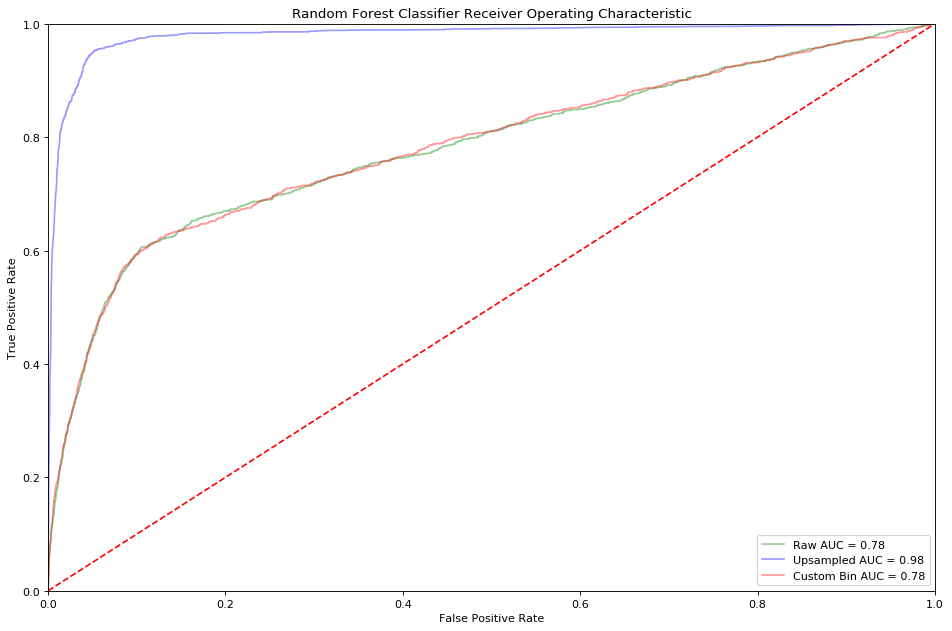

In [121]:
plt.gcf().clear()

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.title('Random Forest Classifier Receiver Operating Characteristic')
plt.plot(fpr_rfc, tpr_rfc, 'g', label = 'Raw AUC = %0.2f' % roc_auc_rfc, alpha=.4)
plt.plot(fpr_rfc_us, tpr_rfc_us, 'b', label = 'Upsampled AUC = %0.2f' % roc_auc_rfc_us, alpha=.4)
plt.plot(fpr_rfc_cb, tpr_rfc_cb, 'r', label = 'Custom Bin AUC = %0.2f' % roc_auc_rfc_cb, alpha=.4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.tight_layout()
plt.show()

In [223]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)
train_score = mlpc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = mlpc.score(X_test, y_test)
print("Test: {}".format(test_score))

Train: 0.8970552530262564
Test: 0.8985999838148417


In [99]:
# Running random search on MLPR
print('Starting MLPR random search at: ', datetime.datetime.now())

param_grid = { 
    "hidden_layer_sizes" : [2, 3, 4],
    "alpha" : [.000001, .00001, .0001, .001, .01],
    "batch_size" : [1, 10, 50, 100, 250],
    "max_iter"  : np.arange(50, 550, 100)
            }

mlpc = MLPClassifier(random_state = 0) 

rs_mlpc = RandomizedSearchCV(estimator=mlpc, param_distributions=param_grid, cv= 3)

rs_mlpc.fit(X_train, y_train)
print('data fitted')
    
bp = rs_mlpc.best_params_ # best parameters
print(rs_mlpc.best_params_)

    
mlpc = MLPClassifier(random_state=0, hidden_layer_sizes = bp['hidden_layer_sizes'], 
alpha=bp['alpha'],
batch_size=bp['batch_size'], 
max_iter=bp['max_iter'])

print('regressor substantiated with best params')
    
mlpc.fit(X_train, y_train)
print('data fitted with best params')

train_score = mlpc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = mlpc.score(X_test, y_test)
print("Test: {}".format(test_score))

print('Ending MLPR random search at: ', datetime.datetime.now())

Starting MLPR random search at:  2018-05-01 14:11:49.054098
data fitted
{'max_iter': 150, 'hidden_layer_sizes': 3, 'batch_size': 100, 'alpha': 1e-05}
regressor substantiated with best params
data fitted with best params
Train: 0.8980611147722937
Test: 0.899166464352189
Ending MLPR random search at:  2018-05-01 14:17:48.220667


In [100]:
# ROC curve calculations
probs = mlpc.predict_proba(X_test)
preds = probs[:,1]
fpr_mlpc, tpr_mlpc, threshold_mlpc = roc_curve(y_test, preds)
roc_auc_mlpc = auc(fpr_mlpc, tpr_mlpc)

In [101]:
print(roc_auc_mlpc)

0.76352418562


In [97]:
# Running random search on MLPR
print('Starting MLPR random search at: ', datetime.datetime.now())

param_grid = { 
    "hidden_layer_sizes" : [1 ,2, 3, 4],
    "alpha" : [.0001, .001, .01],
    "batch_size" : [50, 100, 250, 350, 500, 1000],
    "max_iter"  : np.arange(1250, 2250, 250)
            }

mlpc = MLPClassifier(random_state = 0) 

rs_mlpc = RandomizedSearchCV(estimator=mlpc, param_distributions=param_grid, cv= 3)

rs_mlpc.fit(X_train_us, y_train_us)
print('data fitted')
    
bp = rs_mlpc.best_params_ # best parameters
print(rs_mlpc.best_params_)

    
mlpc = MLPClassifier(random_state=0, hidden_layer_sizes = bp['hidden_layer_sizes'], 
alpha=bp['alpha'],
batch_size=bp['batch_size'], 
max_iter=bp['max_iter'])

print('regressor substantiated with best params')
    
mlpc.fit(X_train_us, y_train_us)
print('data fitted with best params')

train_score = mlpc.score(X_train_us, y_train_us)
print("Train: {}".format(train_score))

test_score = mlpc.score(X_test_us, y_test_us)
print("Test: {}".format(test_score))

print('Ending MLPR random search at: ', datetime.datetime.now())


Starting MLPR random search at:  2018-05-01 14:01:13.863182
data fitted
{'max_iter': 1500, 'hidden_layer_sizes': 3, 'batch_size': 250, 'alpha': 0.001}
regressor substantiated with best params
data fitted with best params
Train: 0.7620479585223591
Test: 0.7685235589427206
Ending MLPR random search at:  2018-05-01 14:02:23.381251


In [98]:
# ROC curve calculations
probs = mlpc.predict_proba(X_test_us)
preds = probs[:,1]
fpr_mlpc_us, tpr_mlpc_us, threshold_mlpc_us = roc_curve(y_test_us, preds)
roc_auc_mlpc_us = auc(fpr_mlpc_us, tpr_mlpc_us)
print(roc_auc_mlpc_us)

0.772335629891


In [102]:
# Running random search on MLPR
print('Starting MLPR random search at: ', datetime.datetime.now())

param_grid = { 
    "hidden_layer_sizes" : [1 ,2, 3],
    "alpha" : [.0001, .001, .01],
    "batch_size" : [1, 10, 50, 100, 250],
    "max_iter"  : np.arange(1250, 2250, 250)
            }

mlpc = MLPClassifier(random_state = 0) 

rs_mlpc = RandomizedSearchCV(estimator=mlpc, param_distributions=param_grid, cv= 3)

rs_mlpc.fit(X_train_cb, y_train_cb)
print('data fitted')
    
bp = rs_mlpc.best_params_ # best parameters
print(rs_mlpc.best_params_)

    
mlpc = MLPClassifier(random_state=0, hidden_layer_sizes = bp['hidden_layer_sizes'], 
alpha=bp['alpha'],
batch_size=bp['batch_size'], 
max_iter=bp['max_iter'])

print('regressor substantiated with best params')
    
mlpc.fit(X_train_cb, y_train_cb)
print('data fitted with best params')

train_score = mlpc.score(X_train_cb, y_train_cb)
print("Train: {}".format(train_score))

test_score = mlpc.score(X_test_cb, y_test_cb)
print("Test: {}".format(test_score))

print('Ending MLPR random search at: ', datetime.datetime.now())


Starting MLPR random search at:  2018-05-01 14:17:48.282359
data fitted
{'max_iter': 1750, 'hidden_layer_sizes': 3, 'batch_size': 100, 'alpha': 0.01}
regressor substantiated with best params
data fitted with best params
Train: 0.8967777739239013
Test: 0.8990046127700898
Ending MLPR random search at:  2018-05-01 14:24:13.669139


In [103]:
# ROC curve calculations
probs = mlpc.predict_proba(X_test_cb)
preds = probs[:,1]
fpr_mlpc_cb, tpr_mlpc_cb, threshold_mlpc_cb = roc_curve(y_test_cb, preds)
roc_auc_mlpc_cb = auc(fpr_mlpc_cb, tpr_mlpc_cb)
print(roc_auc_mlpc_cb)

0.768751702726


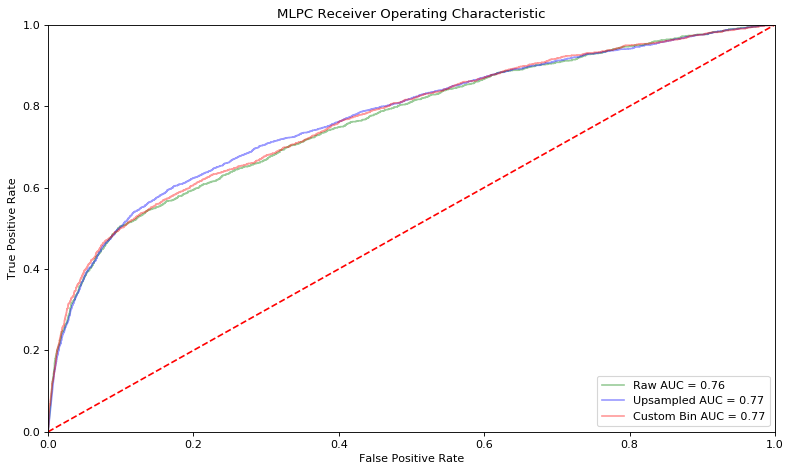

In [123]:
plt.gcf().clear()

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('MLPC Receiver Operating Characteristic')

plt.plot(fpr_mlpc, tpr_mlpc, 'g', label = 'Raw AUC = %0.2f' % roc_auc_mlpc, alpha=.4)
plt.plot(fpr_mlpc_us, tpr_mlpc_us, 'b', label = 'Upsampled AUC = %0.2f' % roc_auc_mlpc_us, alpha=.4)
plt.plot(fpr_mlpc_cb, tpr_mlpc_cb, 'r', label = 'Custom Bin AUC = %0.2f' % roc_auc_mlpc_cb, alpha=.4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.tight_layout()
plt.show()

In [230]:
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)
train_score = knnc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = knnc.score(X_test, y_test)
print("Test: {}".format(test_score))

Train: 0.914085532933301
Test: 0.8895362952172857


In [105]:
print('Starting KNN random search at: ', datetime.datetime.now())

param_grid = { 
    'n_neighbors' : np.arange(2,10,2),
    'leaf_size' : np.arange(15,45,5)
            }

knnc = KNeighborsClassifier() 

rs_knnc = RandomizedSearchCV(estimator=knnc, param_distributions = param_grid, cv= 3)

rs_knnc.fit(X_train, y_train)
print('data fitted')
    
bp = rs_knnc.best_params_ # best parameters
print(rs_knnc.best_params_)

knnc = KNeighborsClassifier(n_neighbors = bp['n_neighbors'], 
leaf_size=bp['leaf_size'])

print('regressor substantiated with best params')
    
knnc.fit(X_train, y_train)
print('data fitted with best params')

train_score = knnc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = knnc.score(X_test, y_test)
print("Test: {}".format(test_score))

print('Ending knnc random search at: ', datetime.datetime.now())

# ROC curve calculations
probs = knnc.predict_proba(X_test)
preds = probs[:,1]
fpr_knnc, tpr_knnc, threshold_knnc = roc_curve(y_test, preds)
roc_auc_knnc = auc(fpr_knnc, tpr_knnc)

print(roc_auc_knnc)

Starting KNN random search at:  2018-05-01 14:24:14.161338
data fitted
{'n_neighbors': 8, 'leaf_size': 20}
regressor substantiated with best params
data fitted with best params
Train: 0.905865214526031
Test: 0.8955248037549567
Ending knnc random search at:  2018-05-01 14:29:01.116800
0.75078118111


In [106]:
print('Starting KNN random search at: ', datetime.datetime.now())

param_grid = { 
    'n_neighbors' : np.arange(1,5,1),
    'leaf_size' : np.arange(15,45,5)
            }

knnc = KNeighborsClassifier() 

rs_knnc = RandomizedSearchCV(estimator=knnc, param_distributions = param_grid, cv= 3)

rs_knnc.fit(X_train_us, y_train_us)
print('data fitted')
    
bp = rs_knnc.best_params_ # best parameters
print(rs_knnc.best_params_)

knnc = KNeighborsClassifier(n_neighbors = bp['n_neighbors'], 
leaf_size=bp['leaf_size'])

print('regressor substantiated with best params')
    
knnc.fit(X_train_us, y_train_us)
print('data fitted with best params')

train_score_us = knnc.score(X_train_us, y_train_us)
print("Train: {}".format(train_score_us))

test_score_us = knnc.score(X_test_us, y_test_us)
print("Test: {}".format(test_score_us))

print('Ending knnc random search at: ', datetime.datetime.now())

# ROC curve calculations
probs = knnc.predict_proba(X_test_us)
preds = probs[:,1]
fpr_knnc_us, tpr_knnc_us, threshold_knnc_us = roc_curve(y_test_us, preds)
roc_auc_knnc_us = auc(fpr_knnc_us, tpr_knnc_us)
print(roc_auc_knnc_us)

Starting KNN random search at:  2018-05-01 14:29:06.113996
data fitted
{'n_neighbors': 1, 'leaf_size': 20}
regressor substantiated with best params
data fitted with best params
Train: 0.9915489306545691
Test: 0.9069134458356015
Ending knnc random search at:  2018-05-01 14:35:04.574896
0.919216459856


In [107]:
print('Starting KNN random search at: ', datetime.datetime.now())

param_grid = { 
    'n_neighbors' : np.arange(2,10,2),
    'leaf_size' : np.arange(15,45,5)
            }

knnc = KNeighborsClassifier() 

rs_knnc = RandomizedSearchCV(estimator=knnc, param_distributions = param_grid, cv= 3)

rs_knnc.fit(X_train_cb, y_train_cb)
print('data fitted')
    
bp = rs_knnc.best_params_ # best parameters
print(rs_knnc.best_params_)

knnc = KNeighborsClassifier(n_neighbors = bp['n_neighbors'], 
leaf_size=bp['leaf_size'])

print('regressor substantiated with best params')
    
knnc.fit(X_train_cb, y_train_cb)
print('data fitted with best params')

train_score_cb = knnc.score(X_train_cb, y_train_cb)
print("Train: {}".format(train_score_cb))

test_score_cb = knnc.score(X_test_cb, y_test_cb)
print("Test: {}".format(test_score_cb))

print('Ending knnc random search at: ', datetime.datetime.now())

# ROC curve calculations
probs = knnc.predict_proba(X_test_cb)
preds = probs[:,1]
fpr_knnc_cb, tpr_knnc_cb, threshold_knnc_cb = roc_curve(y_test_cb, preds)
roc_auc_knnc_cb = auc(fpr_knnc_cb, tpr_knnc_cb)
print(roc_auc_knnc_cb)

Starting KNN random search at:  2018-05-01 14:35:09.838899
data fitted
{'n_neighbors': 8, 'leaf_size': 40}
regressor substantiated with best params
data fitted with best params
Train: 0.9046859283410218
Test: 0.8944727684713119
Ending knnc random search at:  2018-05-01 14:41:27.059788
0.742191347585


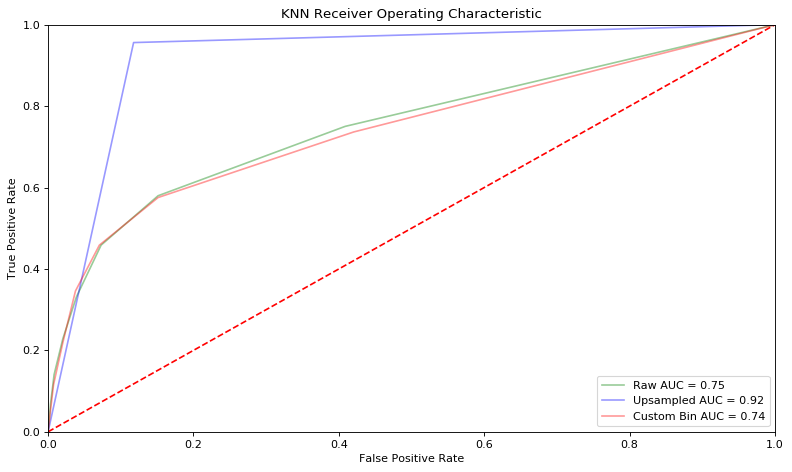

In [124]:
plt.gcf().clear()

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('KNN Receiver Operating Characteristic')
plt.plot(fpr_knnc, tpr_knnc, 'g', label = 'Raw AUC = %0.2f' % roc_auc_knnc, alpha=.4)
plt.plot(fpr_knnc_us, tpr_knnc_us, 'b', label = 'Upsampled AUC = %0.2f' % roc_auc_knnc_us, alpha=.4)
plt.plot(fpr_knnc_cb, tpr_knnc_cb, 'r', label = 'Custom Bin AUC = %0.2f' % roc_auc_knnc_cb, alpha=.4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.tight_layout()
plt.show()

In [240]:
svc = SVC()
svc.fit(X_train, y_train)
train_score = svc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = svc.score(X_test, y_test)
print("Test: {}".format(test_score))

Train: 0.90506746210676
Test: 0.8999757222626851


In [108]:
# Running random search on 
print('Starting SVC random search at: ', datetime.datetime.now())

param_grid = { 
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [.00001, .0001, 0.001, 0.01]
            }


svc = SVC()

rs_svc = RandomizedSearchCV(estimator=svc, param_distributions = param_grid, cv= 3)

rs_svc.fit(X_train, y_train)
print('data fitted')
    
bp = rs_svc.best_params_ # best parameters
print(rs_svc.best_params_)

svc = SVC(C = bp['C'], 
gamma=bp['gamma'])

print('regressor substantiated with best params')
    
svc.fit(X_train, y_train)
print('data fitted with best params')

train_score = svc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = svc.score(X_test, y_test)
print("Test: {}".format(test_score))

print('Ending SVC random search at: ', datetime.datetime.now())

Starting SVC random search at:  2018-05-01 14:41:34.137794
data fitted
{'gamma': 1e-05, 'C': 1000}
regressor substantiated with best params
data fitted with best params
Train: 0.8990322916305366
Test: 0.900623128591082
Ending SVC random search at:  2018-05-01 15:23:49.065628


In [109]:
# Precision recall curve calculations
y_score = svc.decision_function(X_test)

average_precision_svc = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_svc))

precision_svc, recall_svc, _ = precision_recall_curve(y_test, y_score)

Average precision-recall score: 0.44


In [110]:
# Running random search on 
print('Starting SVC random search at: ', datetime.datetime.now())

param_grid = { 
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 10, 100]
            }


svc = SVC()

rs_svc = RandomizedSearchCV(estimator=svc, param_distributions = param_grid, cv= 3)

rs_svc.fit(X_train_us, y_train_us)
print('data fitted')
    
bp = rs_svc.best_params_ # best parameters
print(rs_svc.best_params_)

svc = SVC(C = bp['C'], 
gamma=bp['gamma'])

print('regressor substantiated with best params')
    
svc.fit(X_train_us, y_train_us)
print('data fitted with best params')

train_score_us = svc.score(X_train_us, y_train_us)
print("Train: {}".format(train_score_us))

test_score_us = svc.score(X_test_us, y_test_us)
print("Test: {}".format(test_score))

print('Ending SVC random search at: ', datetime.datetime.now())

Starting SVC random search at:  2018-05-01 15:23:54.899121
data fitted
{'gamma': 100, 'C': 100}
regressor substantiated with best params
data fitted with best params
Train: 0.9937265068049255
Test: 0.900623128591082
Ending SVC random search at:  2018-05-01 17:44:25.134388


In [111]:
# Precision recall curve calculations
y_score_us = svc.decision_function(X_test_us)

average_precision_svc_us = average_precision_score(y_test_us, y_score_us)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_svc_us))

precision_svc_us, recall_svc_us, _ = precision_recall_curve(y_test_us, y_score_us)

Average precision-recall score: 0.94


In [112]:
# Running random search on 
print('Starting SVC random search at: ', datetime.datetime.now())

param_grid = { 
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [.00001, .0001, 0.001, 0.01]
            }


svc = SVC()

rs_svc = RandomizedSearchCV(estimator=svc, param_distributions = param_grid, cv= 3)

rs_svc.fit(X_train_cb, y_train_cb)
print('data fitted')
    
bp = rs_svc.best_params_ # best parameters
print(rs_svc.best_params_)

svc = SVC(C = bp['C'], 
gamma=bp['gamma'])

print('regressor substantiated with best params')
    
svc.fit(X_train_cb, y_train_cb)
print('data fitted with best params')

train_score_cb = svc.score(X_train_cb, y_train_cb)
print("Train: {}".format(train_score_cb))

test_score_cb = svc.score(X_test_cb, y_test_cb)
print("Test: {}".format(test_score))

print('Ending SVC random search at: ', datetime.datetime.now())

Starting SVC random search at:  2018-05-01 17:44:54.651360
data fitted
{'gamma': 0.001, 'C': 100}
regressor substantiated with best params
data fitted with best params
Train: 0.9020498768686483
Test: 0.900623128591082
Ending SVC random search at:  2018-05-01 18:22:55.932918


In [113]:
# Precision recall curve calculations
y_score_cb = svc.decision_function(X_test_cb)

average_precision_svc_cb = average_precision_score(y_test_cb, y_score_cb)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_svc_cb))

precision_svc_cb, recall_svc_cb, _ = precision_recall_curve(y_test_cb, y_score_cb)

Average precision-recall score: 0.40


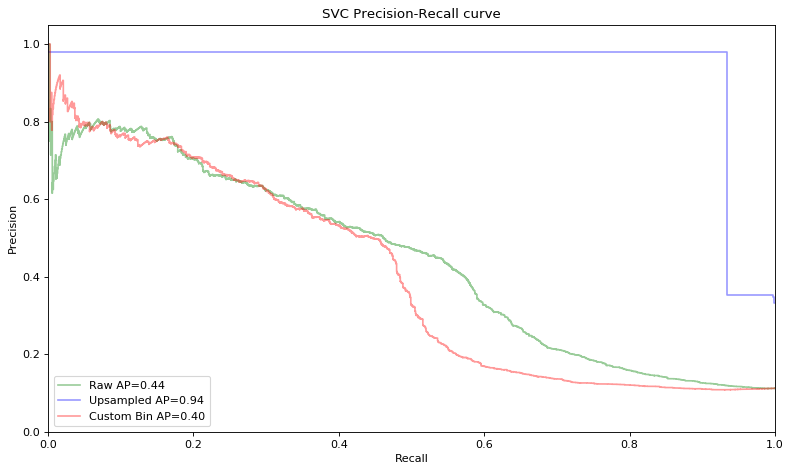

In [125]:
plt.gcf().clear()

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.step(recall_svc, precision_svc, color='g', alpha=0.4,
         where='post', label= 'Raw AP={0:0.2f}'.format(
          average_precision_svc))

plt.step(recall_svc_us, precision_svc_us, color='b', alpha=0.4,
         where='post', label = 'Upsampled AP={0:0.2f}'.format(
          average_precision_svc_us))

plt.step(recall_svc_cb, precision_svc_cb, color='r', alpha=0.4,
         where='post', label = 'Custom Bin AP={0:0.2f}'.format(
          average_precision_svc_cb))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('SVC Precision-Recall curve')
plt.legend()

plt.tight_layout()
plt.show()

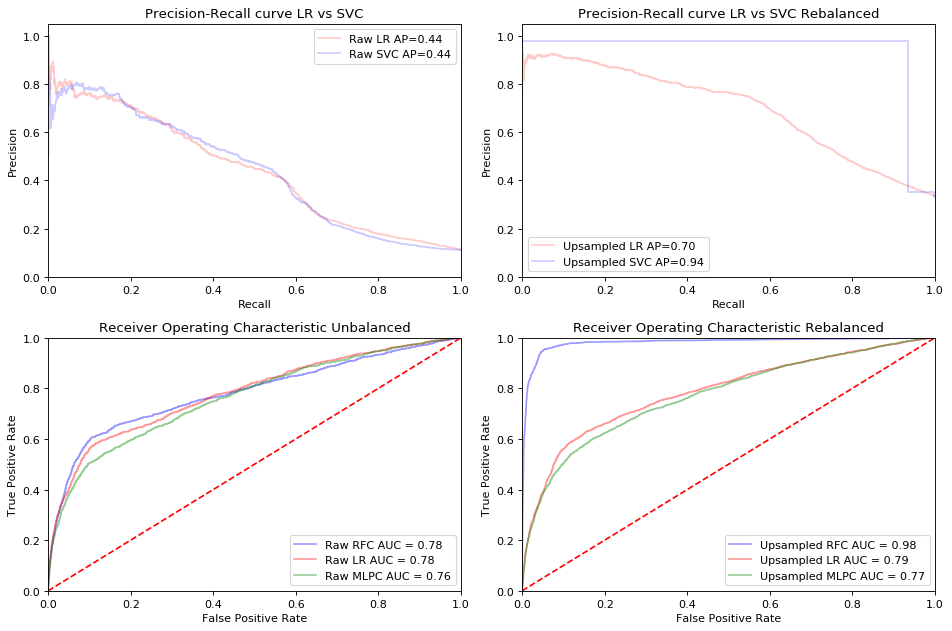

In [126]:
plt.gcf().clear()
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')


plt.subplot(2,2,1)
plt.step(recall_lr, precision_lr, color='r', alpha=0.2, 
         where='post', label='Raw LR AP={0:0.2f}'.format(average_precision_lr))
plt.step(recall_svc, precision_svc, color='b', alpha=0.2, 
         where='post', label='Raw SVC AP={0:0.2f}'.format(average_precision_svc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve LR vs SVC')

plt.legend()

plt.subplot(2,2,2)
plt.step(recall_lr_us, precision_lr_us, color='r', alpha=0.2, 
         where='post', label='Upsampled LR AP={0:0.2f}'.format(average_precision_lr_us))
plt.step(recall_svc_us, precision_svc_us, color='b', alpha=0.2,
         where='post', label='Upsampled SVC AP={0:0.2f}'.format(average_precision_svc_us))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve LR vs SVC Rebalanced')

plt.legend()

plt.subplot(2,2,3)
plt.title('Receiver Operating Characteristic Unbalanced')
plt.plot(fpr_rfc, tpr_rfc, 'b', label = 'Raw RFC AUC = %0.2f' % roc_auc_rfc, alpha=.4)
plt.plot(fpr_lr, tpr_lr, 'r', label = 'Raw LR AUC = %0.2f' % roc_auc_lr, alpha=.4)
plt.plot(fpr_mlpc, tpr_mlpc, 'g', label = 'Raw MLPC AUC = %0.2f' % roc_auc_mlpc, alpha=.4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2,2,4)
plt.title('Receiver Operating Characteristic Rebalanced')
plt.plot(fpr_rfc_us, tpr_rfc_us, 'b', label = 'Upsampled RFC AUC = %0.2f' % roc_auc_rfc_us, alpha=.4)
plt.plot(fpr_lr_us, tpr_lr_us, 'r', label = 'Upsampled LR AUC = %0.2f' % roc_auc_lr_us, alpha=.4)
plt.plot(fpr_mlpc_us, tpr_mlpc_us, 'g', label = 'Upsampled MLPC AUC = %0.2f' % roc_auc_mlpc_us, alpha=.4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.tight_layout()
plt.show()